# 逻辑回归

场景简介：使用逻辑回归实现对鸢尾花的分类预测

## 模型说明

逻辑回归是一个分类模型，根据特征值来预测该样本归属哪一类。  
逻辑回归的预测方程式(模型函数)为:
$h(θ) = \frac{1}{1+e^{-θ^TX}}$   
它的函数图如下：
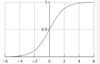  

0<=h(θ) <=1

该函数就是逻辑回归的$模型函数$,也叫做$sigmoid函数$   
X 为特征向量，θ的就是我们要学习的参数，shape为(n_x,1)   
它的预测逻辑一般为：h(θ) >0.5 为正类，h(θ) <0.5 为负类。
当然0.5 这个值也是可以调整的

逻辑回归一般一次只区分两类，所以若要区分多个类(比如k个)，则需要建立k或k-1个分类器。 

## 代价函数与梯度下降

逻辑回归用于二分类，y的取值为:(0:负类 1:正类)  
我们的模型函数得出的其实就是一个概率值，概率大于0.5归于正类，概率小于0.5 ，get_ipython于负类。  
所以y的联合概率分布为：
$L(θ) = \prod_{i=1}^{m}{}P(y^{(i)}| x^{(i)};θ) = \prod_{i=1}^{m}{}h_θ(x^{(i)})^{y^{(i)}}(1-h_θ(x^{(i)})^{y^{(i)}}$
我们当然是希望L(θ)越大越好。这就是我们的目标。  
因为在梯度下降中，我们需要目标函数是凸函数，具有一个极小值。  
所以我们要取负，因为L(θ)是一个连乘，我们将其取对数log，将连乘转为求和，方便计算。即:  
$J(θ) = -log(L(θ)) = -\sum_{i=1}^{m}{}y^{(i)}log(h_θ(x^{(i)})+(1-y^{(i)})log(1-h_θ(x^{(i)})) $  
我们的目标就变成最小化 J(θ)

有了上述，我们就可以来实现逻辑回归了

## 变量说明
对所用到的变量做一个统一说明，方便检查。  
θ·X = W·X+b

设:  
m: 样本个数  
nx：特征维度  
θ：($w_0,w_1,w_2 ...w_{nx})$  
则：  
X的shape 为:(m,nx) ,我们会在X的前面加一列全为1的，所以实际X为：(m,nx)
y的shape为：(m,1)  
θ 的shape = (nx+1)


## 实现

### Package

In [2]:
import numpy as np
from utils import calc_accuracy_class
from utils import fl_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd 

### 加载数据

In [ ]:
X,y = datasets.load_iris(return_X_y=True)
y = y.reshape(-1,1)

In [ ]:
#将数据分为训练集和测试集
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.20,random_state = 1)
print(f"train_X的大小为：{train_X.shape}")
print(f"tain_y的大小为：{train_y.shape}")
print(f"test_X的大小为：{test_X.shape}")
print(f"test_y的大小为：{test_y.shape}")

In [ ]:
#标准化
def nomalize(X,axis):
    mean = np.mean(X,axis)
    std = np.std(X,axis)
    return (X-mean)/std, mean,std

In [ ]:
#将数据标准化
train_X,mean,std = nomalize(train_X,axis=0)
test_X = (test_X-mean)/std

#插入一列全为1的表示x0
train_X = np.insert(train_X,0,1,axis=1)
test_X = np.insert(test_X,0,1,axis=1)
print(train_X.shape)
print(test_X.shape)

### 初始化参数

In [ ]:
def init_parameters(n):
    theta = np.random.randn(n,1)
    return theta

### Sigmoid函数

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### 代价函数
costs = $-\frac{1}{m}\sum_{i=1}^{m}{}y^{(i)}log(y'^{(i)})+(1-y^{(i)})log(1-y'^{(i)})$

In [ ]:
def compute_cost(y_hat,y):
    '''
    y_hat --当前阶段的预测值
    y -- 真实值
    '''
    m = y.shape[0]
    cost = -np.sum(y*np.log(y_hat)+(1-y)*(np.log(1-y_hat)))/m
    return cost
    

### 梯度下降

costs = $-\frac{1}{m}\sum_{i=1}^{m}{}y^{(i)}log(y'^{(i)})+(1-y^{(i)})log(1-y'^{(i)})$  
$y' = h_θ(x^{(i)}) = \frac{1}{1+e^{-θ^TX}}$  
设z=θ·x
可解得:  
dz = (y'-y)  
所以:  
dθ = x.T·(y'-y)

In [ ]:
def gradient_descent(X,y_hat,y,theta,lr):
    '''
    y_hat --当前阶段的预测值
    y -- 真实值
    lr -- 学习速率
    '''
    d_theta = np.dot(X.T,y_hat-y)
    theta = theta - lr*d_theta
    return theta

### 基本逻辑单元

基本逻辑单元，处理二分类。多分类不过由多个基本逻辑单元构成

In [ ]:
class BasicLogicUnit:
    def __init__(self,X,y,category):
        '''
        X -- 训练样本,shape:(m,nx)
        y -- 0 or 1 shape:(m,1)
        category -- 真正的类别，即y为1时，所代表的类别
        '''
        self.X = X
        self.y = y
        self.category = category
        self.theta = init_parameters(self.X.shape[1])
        
        
    def fit(self,lr,steps):
        '''
        训练
        '''
        m,n_x = self.X.shape
        costs = []
        for step in range(steps):
            z = np.dot(self.X,self.theta)
            y_ = sigmoid(z)
            loss = compute_cost(y_,self.y)
            costs.append(loss)
            
            self.theta = gradient_descent(self.X,y_,self.y,self.theta,lr)
            
            if step % 50 == 0:
                print(f"\nAfter {step} step(s),cost is :{loss}")
        
        return costs
    def predict(self,X):
        '''
        预测
        '''
        z = np.dot(X,self.theta)
        return sigmoid(z)
        
        

### 逻辑回归模型

根据训练数据，整合多个逻辑单元进行预测

In [ ]:
class LogicRegressionModel:
    def __init__(self):
        self.logic_unit_list = []
    
    def fit(self,tain_X,train_y,learning_rate =0.05,steps = 500):
        classes = set(np.squeeze(train_y))
        n_classes = len(classes)
        m,n_x = train_X.shape
        #根据分类的类别，一个个使用逻辑单元进行分类训练
        for c in classes:
            unit_train_y = np.where(train_y == c,1,0)
            logic_unit = BasicLogicUnit(train_X,unit_train_y,c)
            self.logic_unit_list.append(logic_unit)
            
            costs = logic_unit.fit(learning_rate,steps)
            #绘制损失曲线
            plt.xlim(0,steps)
            plt.plot(costs)
            plt.xlabel("steps")
            plt.ylabel("costs")
            #plt.title(f"c = {self.category}")
            
            y_pred = logic_unit.predict(train_X)
            y_pred = np.where(y_pred > 0.5,1,0)
            acc = calc_accuracy_class(y_pred,unit_train_y)
            print(f"{c}类的准确率为:{acc}")
            
    
    def predict(self,X):
        m = X.shape[0]
        #为了可视化，我们将其以DataFrame的形式输出
        zeros=  np.zeros((m,1),dtype=int)
        results_pd = pd.DataFrame(zeros,columns=["result"])
        for logic_unit in self.logic_unit_list:
            prob_y = logic_unit.predict(X)
            results_pd[logic_unit.category] = prob_y
        max_indexs = np.argmax(np.array(results_pd),axis=1)
        y_ = np.array(results_pd.columns)[max_indexs]
        y_ = y_.T
        results_pd["result"] = y_

        print(results_pd.head())
        return y_
    

In [ ]:
model = LogicRegressionModel()
model.fit(train_X,train_y,learning_rate=0.05,steps=40)

In [ ]:
logits = model.predict(train_X)
fl_score(np.squeeze(logits),np.squeeze(train_y))
acc = calc_accuracy_class(logits,train_y)
print("准确率为：%g"%(acc))

In [ ]:
from utils import calc_accuracy_class
logits = model.predict(test_X)
fl_score(np.squeeze(logits),np.squeeze(test_y))
acc = calc_accuracy_class(logits,test_y)
print("准确率为：%g"%(acc))
